<a href="https://colab.research.google.com/github/thomi137/colab/blob/master/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

In [0]:
NESN_POS = 10 # Nestle
CFR_POS = 5  # Richemond
JFN_POS = 2  # Jungfraubahnen Holding AG
NOVN_POS = 2 # Novartis
AAPL_POS = 11# Apple (USD)
DGE_POS = 5  # Diageo (GBX)
FEVR_POS = 10# Fevertree (GBX)

In [0]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 9, 30)

In [0]:
AAPL = web.DataReader('AAPL', 'yahoo', start, end)
DGE = web.DataReader('DGE.L', 'yahoo', start, end)
JFN = web.DataReader('JFN.SW', 'yahoo', start, end)
CFR = web.DataReader('CFR.SW', 'yahoo', start, end)
NOVN = web.DataReader('NOVN.SW', 'yahoo', start, end)
NESN = web.DataReader('NESN.SW', 'yahoo', start, end)
FEVR = web.DataReader('FEVR.L', 'yahoo', start, end)

In [0]:
USD_GBP = web.DataReader('DEXUSUK', 'fred', start, end)
CHF_USD = web.DataReader('DEXSZUS', 'fred', start, end)
USD_GBP.columns=['USD_GBP']
CHF_USD.columns=['CHF_USD']
CHF_USD['USD_CHF'] = 1./CHF_USD['CHF_USD']
Curr = pd.concat([CHF_USD, USD_GBP], axis=1)
Curr.tail()
Curr['GBP_USD']=1./Curr['USD_GBP']
Curr['GBP_CHF']=Curr['GBP_USD']*Curr['USD_CHF']
Curr['CHF_GBP']=1./Curr['GBP_CHF']

In [6]:
Curr.tail()

,CHF_USD,USD_CHF,USD_GBP,GBP_USD,GBP_CHF,CHF_GBP
DATE,,,,,,
2019-09-24,0.9872,1.012966,1.2475,0.801603,0.811997,1.231532
2019-09-25,0.9909,1.009184,1.2363,0.808865,0.816293,1.225050
2019-09-26,0.9928,1.007252,1.2343,0.810176,0.816051,1.225413
2019-09-27,0.9919,1.008166,1.2312,0.812216,0.818848,1.221227
2019-09-30,0.9978,1.002205,1.2305,0.812678,0.814470,1.227793


In [0]:
stocks = pd.concat([
    NESN['Adj Close'],
    CFR['Adj Close'],
    JFN['Adj Close'],
    NOVN['Adj Close'],
    AAPL['Adj Close'] * Curr['CHF_USD'],
    DGE['Adj Close']/100 * Curr['CHF_GBP'],
    FEVR['Adj Close']/100 * Curr['CHF_GBP'],
],
    axis=1
)

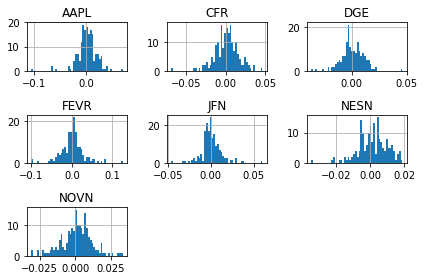

In [8]:
stocks.columns=['NESN', 'CFR', 'JFN', 'NOVN', 'AAPL', 'DGE', 'FEVR']
stocks.pct_change(1).corr()
log_ret = np.log(stocks/stocks.shift(1))
log_ret.hist(bins=50)
plt.tight_layout()

In [0]:
log_ret.dropna(inplace=True)

In [0]:
num_ports = 100000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(7))
    weights = weights/np.sum(weights)
    all_weights[ind,:] = weights
    
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [11]:
sharpe_arr.max()
all_weights[sharpe_arr.argmax(),:]
sharpe_arr.argmax()

83048

In [0]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

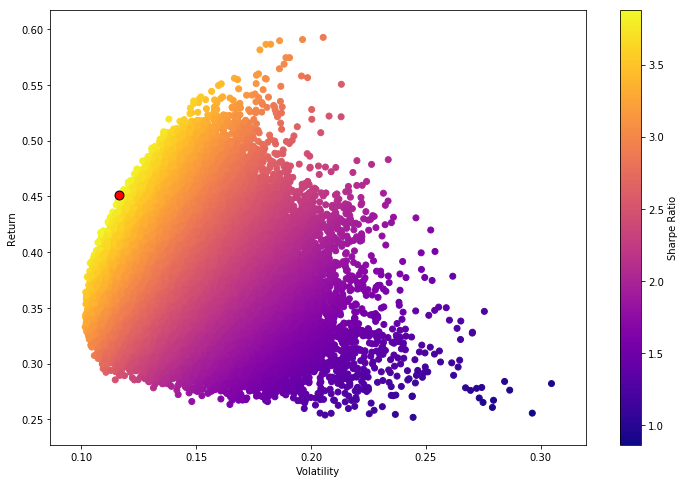

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c='red', s=80, edgecolors='black' )